In [112]:
import sys
import json

import matplotlib.pyplot as plt
from pyntcloud import PyntCloud

In [6]:
pwd

'd:\\gs_cv\\food_volume_estimation\\food_volume_estimation'

(800, 1280, 3)


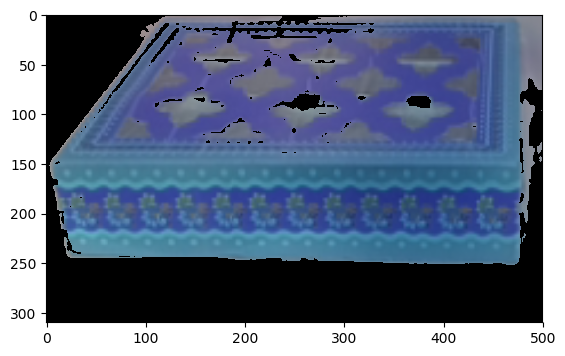

In [106]:
#81-diag 71.8-horizontal
import matplotlib.pyplot as plt
import cv2
import numpy as np

img = cv2.imread("..\images\img2.png")
img = cv2.resize(img, (1280,800))
print(img.shape)
#centre crop
h, w ,_= img.shape
center = img.shape
x = (center[1]/2 - w/4) - 65
y = center[0]/2 - h/4

crop_img = img[int(y+190):int(y+h-300), int(x+30):int(x+w/2-110)]
# crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
# cv2.imshow('crop_img', crop_img)
# cv2.waitKey(1)
# cv2.destroyAllWindows()



hsv = cv2.cvtColor(crop_img, cv2.COLOR_BGR2HSV)

    # define range of white color in HSV
    # change it according to your need !
sensitivity = 100
lower_white = np.array([0,0,255-sensitivity])
upper_white = np.array([255,sensitivity,255])

# Threshold the HSV image to get only white colors
mask = cv2.inRange(hsv, lower_white, upper_white)
# Bitwise-AND mask and original image
res = cv2.bitwise_and(crop_img,crop_img, mask= 255-mask)



# ret,th1 = cv2.threshold(crop_img,150,255,cv2.THRESH_BINARY)


plt.imsave('thresh', res)

plt.figure
plt.imshow(res)

# plt.figure
# plt.imshow(crop_img)






In [121]:
plt.imsave('crop_img', crop_img)

In [84]:
thresh = cv2.imread("thresh.png", 0)
mask = thresh != 0

In [85]:
mask = mask.astype(int)
plt.imsave('mask', mask*250)
mask

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [60]:
estimator = VolumeEstimator(arg_init=False)
# Set plate adjustment relaxation parameter
estimator.relax_param = 0.01

[*] VolumeEstimator not initialized.


TypeError: estimate_volume() got multiple values for argument 'plate_diameter_prior'

In [110]:
disp_map = np.load('../images/disparity_map_4.npy')
disp_map.shape

h, w = disp_map.shape
center = disp_map.shape
x = (center[1]/2 - w/4) - 65
y = center[0]/2 - h/4

crop_disp = disp_map[int(y+190):int(y+h-300), int(x+30):int(x+w/2-110)]

crop_disp.shape

(310, 500)

In [118]:
# Estimate volumes in input image
input_image = 'sad.jpg'
# seg_mask = 'thresh.png'
thresh = cv2.imread("thresh.png", 0)
mask = thresh != 0
mask = mask.astype(int)
from food_volume_estimation.volume_estimator import VolumeEstimator


plate_diameter = 0 # Set as 0 to ignore plate detection and scaling
outputs_list = estimator.estimate_volume(input_image, crop_disp, mask, plot_results=True)

AttributeError: 'VolumeEstimator' object has no attribute 'model_input_shape'

In [115]:
mask.shape

(310, 500)

In [119]:
plt.imsave('disp', crop_disp)

In [120]:
plt.imsave('mask', mask)